In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import pandas as pd

In [3]:
temp = pd.read_csv("temperature.csv", skiprows=5, usecols=range(2), names=["months", "temperature"])
temp.head()

,months,temperature
0,2015/1,0.1
1,2015/2,1.3
2,2015/3,5.3
3,2015/4,10.9
4,2015/5,17.3


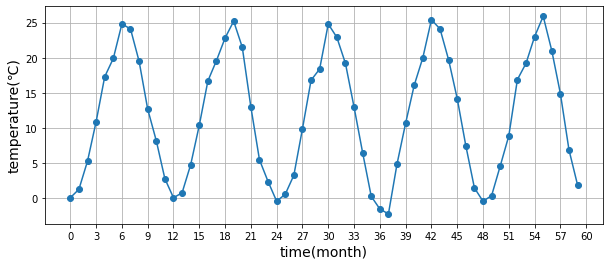

In [5]:
plt.figure(figsize=(10, 4))
plt.xlabel('time(month)', fontsize=14)
plt.ylabel('temperature(℃)', fontsize=14)
plt.xticks(np.arange(0, 61, 3))
plt.grid()
plt.plot(temp["temperature"], marker='o')

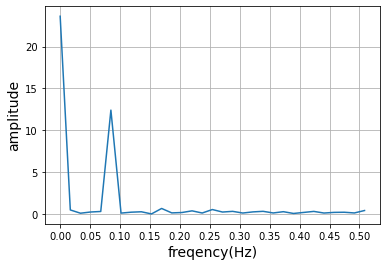

In [6]:
# 高速フーリエ変換(FFT)
F = np.fft.fft(temp["temperature"])
# FFT結果を絶対値に変換
F_abs = np.abs(F)
# 振幅を元のデータに揃える
F_abs_amp = F_abs / len(temp.index) * 2
# 周波数軸のデータ作成
fq = np.linspace(0, 1, len(temp.index))

#グラフ表示
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.xticks(np.arange(0, 0.6, 0.05))
plt.grid()
plt.plot(fq[:int(len(temp.index)/2)+1], F_abs_amp[:int(len(temp.index)/2)+1]) # ナイキスト定数まで表示

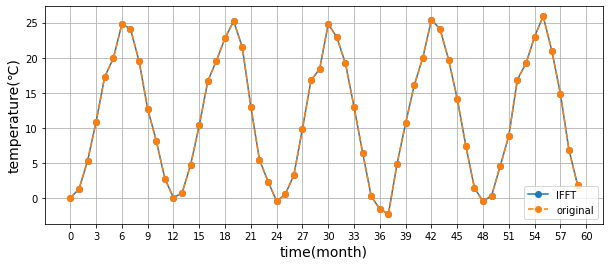

In [7]:
#逆高速フーリエ変換(IFFT)
F_ifft = np.fft.ifft(F)
#実数部の取り出し
F_ifft_real = F_ifft.real

#グラフ表示
plt.figure(figsize=(10, 4))
plt.xlabel('time(month)', fontsize=14)
plt.ylabel('temperature(℃)', fontsize=14)
plt.xticks(np.arange(0, 61, 3))
plt.grid()
plt.plot(F_ifft_real, marker='o', label="IFFT")#IFFT結果
plt.plot(temp["temperature"], marker='o', linestyle="--", label="original") #元データ
plt.legend(loc='best')